# BVPs Relaxation methods


* Very common method for ODEs and PDEs
* Extends easily to multiple dimensions

### Step 1

Discretize the domain into a finite difference grid. That is, a set of discrete points upon which we will find the solution.
* Normally, but not always, put points on the boundary.
* Here, we'll consider a uniform grid for now.
```
|         :   :        |
O   O   O : O : O   O  O
|      i-1  i  i+1     |
x=0                   x=R 
```


### Step 2

Approximate the exact derivatives in the ODE by finite difference approximations (FDS)
* Consider the linear second order BVP with Dirichlet BCs.
    $$y^{\prime\prime} + P(x)y^{\prime} + Q(x)y = F(x), $$
    $$ y(x=0)=y_L,$$
    $$ y(x=R)=y_R.$$
* Approximate the second derivtive as
    $$y_i^{\prime\prime} = \left(\frac{d^2y}{dx^2}\right)_i = \frac{y_{i+1/2}^{\prime}-y_{i-1/2}^{\prime}}{\Delta x} = \frac{\frac{y_{i+1}-y_i}{\Delta x}-\frac{y_i - y_{i-1}}{\Delta x}}{\Delta x} = 
    \frac{y_{i+1}-2y_i+y_{i-1}}{\Delta x^2}.$$
    * This is a different way to get the same result as from a Taylor Series.
* Approximate the first derivative as 
    $$y_i^{\prime} = \left(\frac{dy}{dx}\right)_i = \frac{y_{i+1}-y_{i-1}}{2\Delta x}.$$


### Step 3

Substitute the FDAs into the ODE to get the finite difference equation (FDE).
$$\frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta x^2} + P_i\frac{y_{i+1}-y_{i-1}}{2\Delta x} + Q_iy_i = F_i.$$
* Note that $P$, $Q$, and $F$ are taken at point $i$.
* Note that we have one of these equations at each point $i$ in the domain.
* With Dirichlet boundaries, only the *interior* points are solved.
* The single, continuous ODE has become a system of algebraic equations.


### Step 4

Solve the system of algebraic equations.
* Rewrite the FDE as coefficients of the unknowns $y_{i-1}$, $y_i$, $y_{i+1}$:

<font color='blue'> 
    $$\left(\frac{1}{\Delta x^2} - \frac{P_i}{2\Delta x}\right) y_{i-1} +
    \left(Q_i - \frac{2}{\Delta x^2}\right)y_i + \left(\frac{1}{\Delta x^2} + \frac{P_i}{2\Delta x}\right)y_{i+1} = F_i.$$
</font>

* This can be rewritten with coefficients $l_i$, $a_i$, $u_i$, and $b_i$ as

<font color='blue'> 
$$l_i y_{i-1} + a_iy_i + u_iy_{i+1} = b_i.$$
</font>

<img src="https://ignite.byu.edu/che541/lectures/figs/l20_f01.png" width="400">

* Note that each point $i$ depends on its two neighbors.


* This is a linear system that will result in a tridiagonal system of equations that can be solved with the Thomas Algorithm.

<img src="https://ignite.byu.edu/che541/lectures/figs/l20_f02.png" width="500">
    
* Note how and where the boundary conditions show up.


* The Thomas Algorithm needs arrays $l$, $a$, $u$, and $b$.
    * Here, $b$ is the right hand side array of $F_i$ with boundary conditions included. 
    
    <font color='blue'>
    \begin{align*}
    &l_i = \frac{1}{\Delta x^2} - \frac{P_i}{2\Delta x},\\
    &a_i = Q_i - \frac{2}{\Delta x^2},\\
    &u_i = \frac{1}{\Delta x^2} + \frac{P_i}{2\Delta x},\\
    &b_i = F_i,\,\,\,\,\,i=2,\ldots,(n-1)-2,\\
    &b_1 = F_1 - l_1y_0, \\
    &b_{n-2} = F_{n-2} - u_{n-2}y_{n-1}.
    \end{align*}
    </font>

* For the above matrix $n=7$ so $i$ varies from $0$ to $n-1=6$, and our unknowns are $y_1$ to $y_{n-2} = y_{5}$. Our interior points are $y_2$ to $y_{n-3}=y_4$.

### Shooting versus relaxation
* Hoffman
    * Shooting poses no special problems for nonlinear ODEs, espeically explicit, but also implicit.
    * Relaxation can be hard for nonlinear problems.
* Numerical Recipes (Press et al.)
    * Relaxation works better than shooting when the BCs are especially delicate or subtle, or where they involve complicated algebraic relations that cannot easily be solved in closed form.
    * Relaxation is better on nonuniform grids. Shooting can more simply make adaptive grids. Grid spacing in shooting is determined simply, and on the fly, as opposed to equilibrium methods where the whole grid is set at the beginning, then the problem is solved, then perhaps refine the grid.
    * Relaxation works best when the solution is smooth and not highly oscillatory (e.g., most engineering problems).

* "Until you have enough experience to make your own judgement between the two methods, you might wish to follow the advice of your authors, who are notorious computer gunslingers: We always shoot first and only then relax."

### Example
Solve the following with Dirichlet boundary conditions.
$$y^{\prime\prime} + Py^{\prime} + Qy = F.$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from thomas import *

In [2]:
ngrd = 21
Ldom = 1.0
yL   = 0.5
yR   = 0.0
P    = np.full(ngrd, 4.0)
Q    = np.zeros(ngrd)
F    = np.full(ngrd, -10.0)

In [3]:
x  = np.linspace(0, Ldom, ngrd)
dx = x[1] - x[0]

l = 1.0/dx**2 - P/2/dx
a = Q         - 2/dx**2
u = 1.0/dx**2 + P/2/dx
b = F
b[1] -= l[1]*yL
b[ngrd-2] -= u[ngrd-2]*yR


In [4]:
y = thomas(a[1:-1], u[1:-1], l[1:-1], b[1:-1])

y = np.insert(y,0,yL)
y = np.append(y,yR)

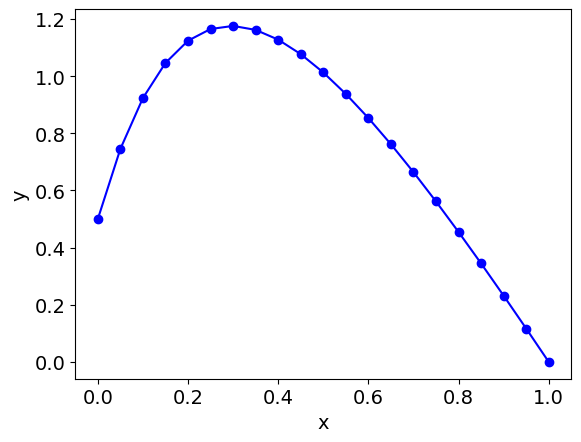

In [5]:
plt.rc('font', size=14)
plt.plot(x,y, 'bo-')
plt.xlabel('x')
plt.ylabel('y');

In [6]:
a = [1,2,3,4,5]
a[1:-1]

[2, 3, 4]